<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import module.


In [5]:
import pandas as pd
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Load the dataset into a dataframe.


In [2]:
df=pd.read_csv(r"C:\Users\User\Documents\Andrew Ng's ML\ibm capstone\M1_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


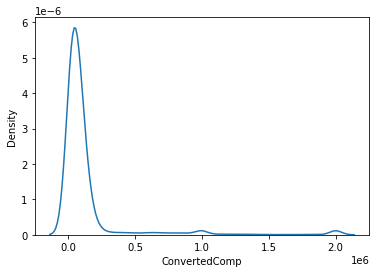

In [6]:
import seaborn as sns
ax = sns.distplot(df['ConvertedComp'], hist=False)

Plot the histogram for the column `ConvertedComp`.


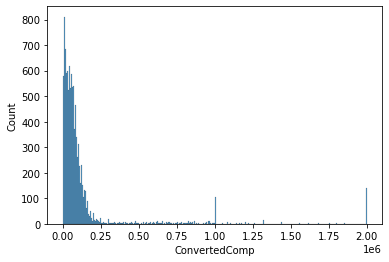

In [7]:
ax = sns.histplot(df['ConvertedComp'])

What is the median of the column `ConvertedComp`?


In [12]:
df['ConvertedComp'].median()

57744.0

How many responders identified themselves only as a **Man**?


In [13]:
(df['Gender']=="Man").sum()

10626

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [14]:
df[df['Gender'] == 'Woman']['ConvertedComp'].median()

57636.0

In [15]:
df[df['Gender'] == 'Man']['ConvertedComp'].median()

57744.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [16]:
df['Age'].describe()

count    11255.000000
mean        30.772394
std          7.392780
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

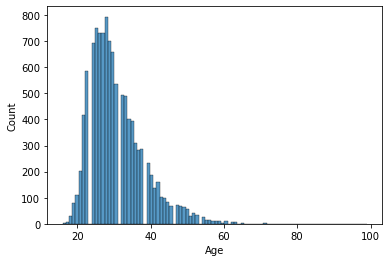

In [17]:
sns.histplot(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


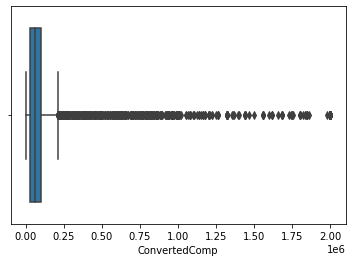

In [18]:
ax = sns.boxplot(x=df['ConvertedComp'])

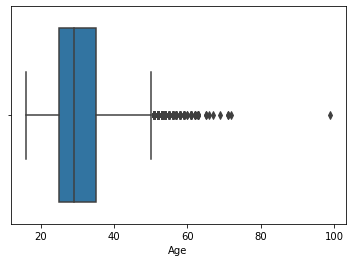

In [19]:
ax = sns.boxplot(x=df['Age'])

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [20]:
IQR = df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)
IQR

73273.0

Find out the upper and lower bounds.


In [22]:
Lowerbound = df['ConvertedComp'].quantile(0.25) - 1.5*IQR
Lowerbound = max(Lowerbound, df['ConvertedComp'].min())
Lowerbound

0.0

In [23]:
Upperbound = df['ConvertedComp'].quantile(0.75) + 1.5*IQR
Upperbound

209909.5

Identify how many outliers are there in the `ConvertedComp` column.


In [24]:
len(df[df['ConvertedComp'] > Upperbound])

888

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
df1 = df[df['ConvertedComp'] <= Upperbound]

In [27]:
print(df1['ConvertedComp'].median())
print(df1['ConvertedComp'].mean())

52704.0
59878.65515139199


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [29]:
df.corr()["Age"]

Respondent       0.005103
CompTotal        0.007036
ConvertedComp    0.103652
WorkWeekHrs      0.036887
CodeRevHrs      -0.018505
Age              1.000000
Name: Age, dtype: float64